# Fast Fourier Transform

Fourier transform is a vital tool in various areas such as Physics and Engineering.

The regular Fourier transform has a time complexity of $O(N^2)$ so a faster algorithm is desirable.
This is where the Fast Fourier transform(FFT) comes in play. Its timecomplexity is much faster and almost linear with $O(N\log(N))$.
In the following a version of the FFT is implemented. It works best for sample sizes that are powers of 2.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

To increase nummerical stability I used the sin/ cos expansion of the exponential.

In [41]:
import numpy as np

def fft(n, f):
    if n == 1:
        return f.astype(complex)
    else:
        n2 = int(n/2)
        g = fft(n2, f[::2])
        h = fft(n2, f[1::2])
        c = np.zeros(n, dtype=complex)
        for k in range(n2):
            cos_term = np.cos(2*np.pi*k/n)
            sin_term = np.sin(2*np.pi*k/n)
            c[k] = g[k] + (cos_term - 1j*sin_term)*h[k]
            c[k+n2] = g[k] - (cos_term - 1j*sin_term)*h[k]
        return c

To test the implementation we will run the code on a gaussian. The FT of a gaussian will also produce a gaussian.

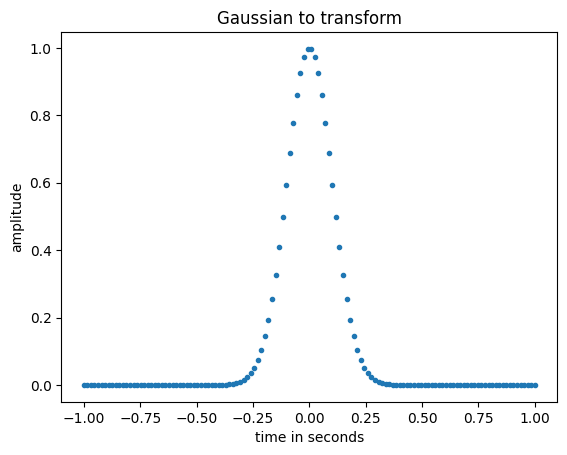

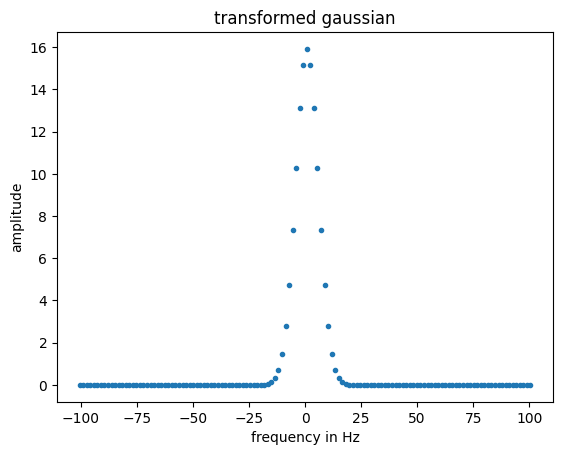

In [42]:
n = 128

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(-1, 1, n)
f = gaussian(x, 0, 0.1)

trans = fft(n, f)

n2 = int(n/2)
new = np.append(trans[-n2:], trans[:n2])

freqs = np.linspace(-n/2, n/2, n) * (np.pi/2)

plt.title("Gaussian to transform")
plt.plot(x, f, ".")
plt.xlabel("time in seconds")
plt.ylabel("amplitude")
plt.show()

plt.title("transformed gaussian")
plt.plot(freqs, abs(new), ".")
plt.xlabel("frequency in Hz")
plt.ylabel("amplitude")
plt.show()

As expexted the algorithm produces a gaussian.

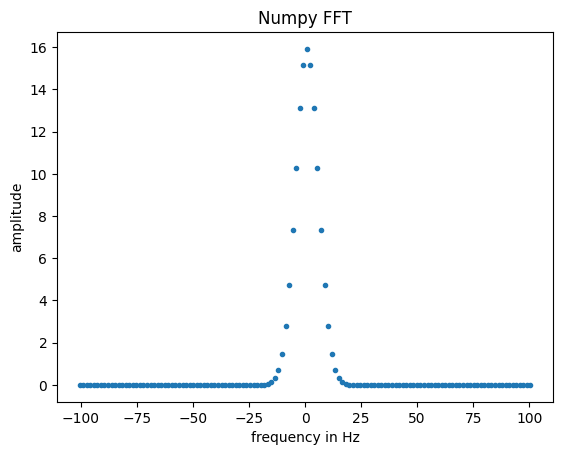

In [43]:
#check with numpy fft
test = np.fft.fft(f)

new = np.append(test[-n2:], test[:n2])

plt.plot(freqs, abs(new),".")
plt.title("Numpy FFT")
plt.xlabel("frequency in Hz")
plt.ylabel("amplitude")
plt.show()

The results aggree with the implementation of the numpy library.